<ipython-input-1-18ae79300add>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_summary = df.groupby('DiscountBucket')['ProfitMargin'].mean().reset_index()


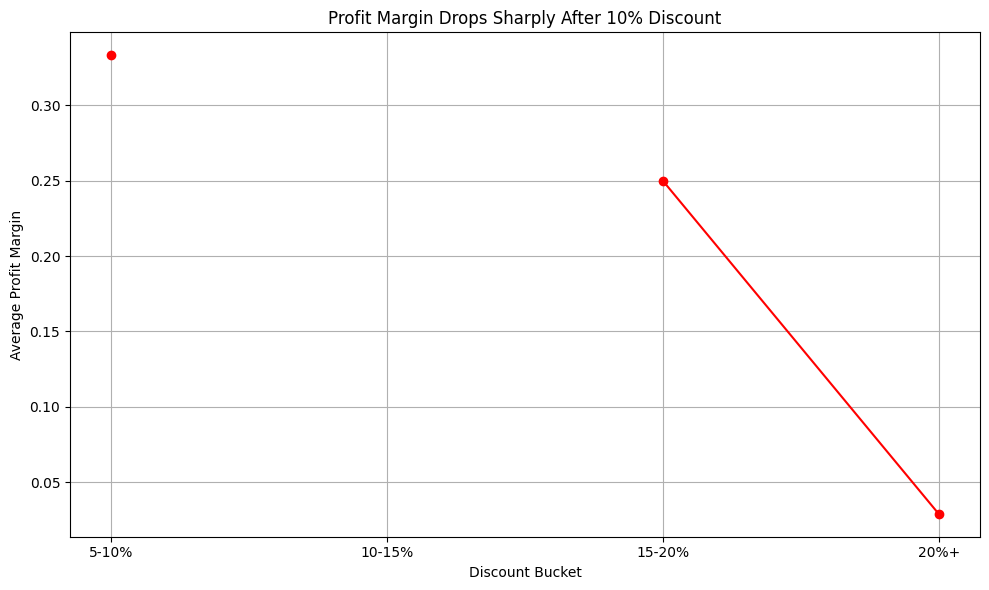

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/content/final_with_smart_strategy.csv")

# Ensure discount and margin columns are float
df['Discount'] = df['Discount'].astype(float)
df['ProfitMargin'] = df['EstimatedProfit'] / df['SALES']

# Create discount buckets: from 0% to above 20%
discount_bins = [0.001, 0.05, 0.10, 0.15, 0.20, 1.0]
bucket_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20%+']

df['DiscountBucket'] = pd.cut(df['Discount'], bins=discount_bins, labels=bucket_labels)

# Group by discount bucket and calculate average profit margin
bucket_summary = df.groupby('DiscountBucket')['ProfitMargin'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bucket_summary['DiscountBucket'], bucket_summary['ProfitMargin'],
         marker='o', linestyle='-', color='red')
plt.title('Profit Margin Drops Sharply After 10% Discount')
plt.xlabel('Discount Bucket')
plt.ylabel('Average Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()
